In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import nibabel as nb
import networkx as nx
import os

from multiplot import feature_plot
from collections import OrderedDict

font = {'weight' : 'bold',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

In [2]:
# Initializing dataset names
dnames = list(('/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/KKI2009/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/MRN114/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/MRN1313/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/SWU4/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/BNU1/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/BNU3/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/NKI1/',
               '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/NKIENH/'))

names = list(('KKI2009', 'MRN114', 'MRN1313', 'SWU4', 'BNU1', 'BNU3', 'NKI1', 'NKIENH'))

# dnames = list(('/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/KKI2009/',
#                '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/MRN114/',
#                '/Users/gkiar/code/classes/upward-spiral/grelliam/data/desikan/NKI1/'))

# names = list(('KKI2009', 'MRN114', 'NKI1'))

print "Datasets: " + ", ".join(names)
print "D = " + str(len(names))

# Getting graph names
fs = OrderedDict()

for idx, dd in enumerate(names):
        fs[dd] = [root+fl for root, dir, files in os.walk(dnames[idx]) for fl in files if fl.endswith(".graphml")]

Datasets: KKI2009, MRN114, MRN1313, SWU4, BNU1, BNU3, NKI1, NKIENH
D = 8


In [3]:
def loadGraphs(filenames, printer=False):
        gstruct = OrderedDict()
        for idx, files in enumerate(filenames):
            if printer:
                print "Loading: " + files
            gstruct[files] = nx.read_graphml(files)
        return gstruct

In [4]:
graphs = OrderedDict()
for idx, name in enumerate(names):
    graphs[name] = loadGraphs(fs[name], printer=False)

In [5]:
graphs.keys()

['KKI2009', 'MRN114', 'MRN1313', 'SWU4', 'BNU1', 'BNU3', 'NKI1', 'NKIENH']

## NNZ

In [25]:
nnz = OrderedDict()
for idx, name in enumerate(names):
    nnz[name] = OrderedDict((subj, len(nx.edges(graphs[name][subj]))) for subj in graphs[name])

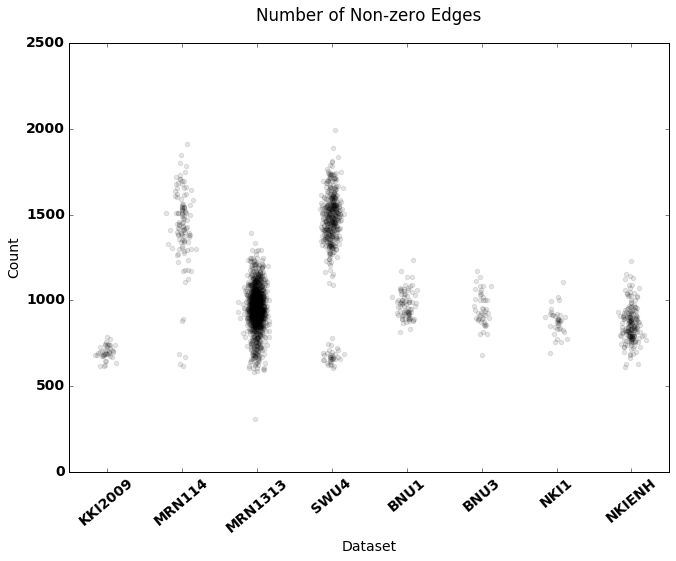

<multiplot.feature_plot instance at 0x10eb89248>

In [27]:
feature_plot(nnz, names, 'Number of Non-zero Edges', plot_mode='scatter',
             fig_outfile='../figs/multi_nnz_scatter.png')

## Degree Distribution

In [28]:
deg = OrderedDict()
for idx, name in enumerate(names):
    deg[name] = OrderedDict((subj, np.array(nx.degree(graphs[name][subj]).values())) for subj in graphs[name])

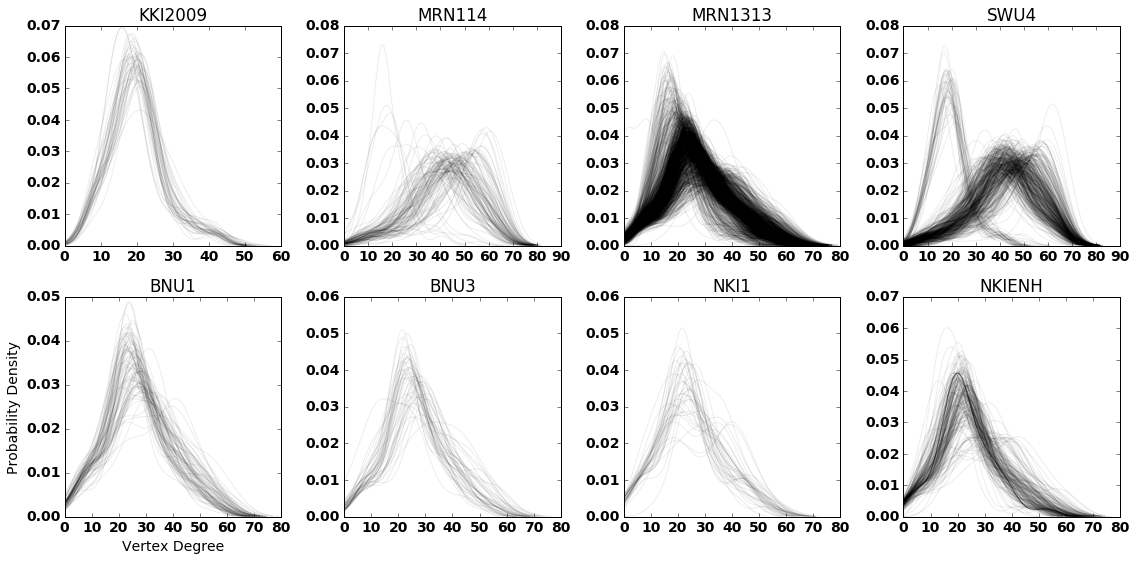

<multiplot.feature_plot instance at 0x14091d6c8>

In [30]:
feature_plot(deg, names, 'Degree', plot_mode='hist', xlab = 'Vertex Degree',
             ylab = 'Probability Density', fig_outfile = '../figs/multi_deg_hist.png')

## Edge Weights

In [6]:
ew = OrderedDict()
for idx, name in enumerate(names):
    ew[name] = OrderedDict((subj, [graphs[name][subj].get_edge_data(e[0],e[1])['weight']
                            for e in graphs[name][subj].edges()]) for subj in graphs[name])

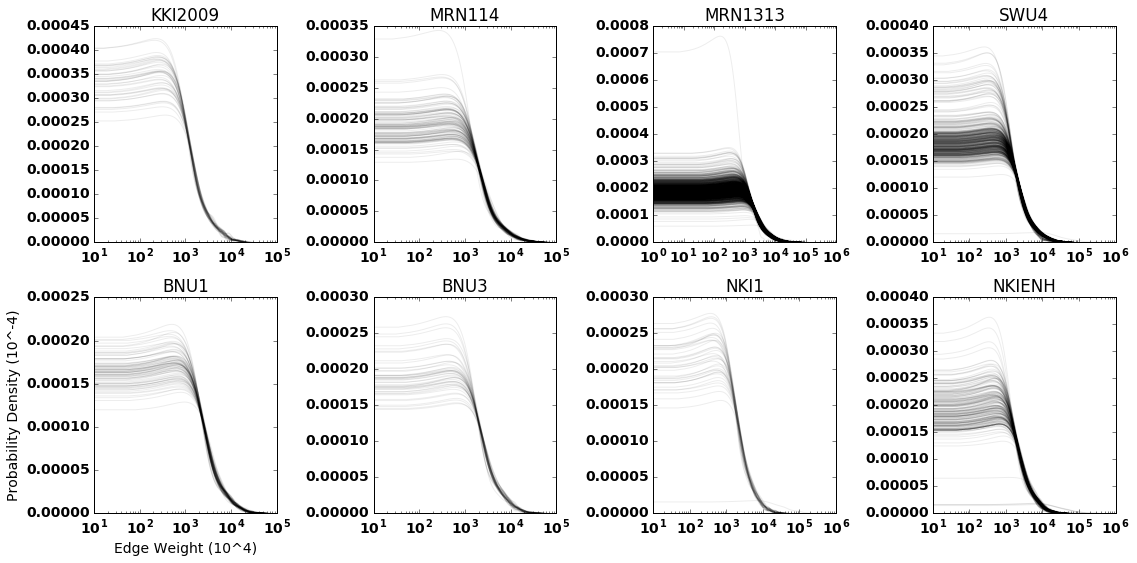

<multiplot.feature_plot instance at 0x10b746d40>

In [9]:
feature_plot(ew, names, 'Edge Weights', plot_mode='hist', xlab = 'Edge Weight', axis_scale='log', yscale=1e4
             ylab = 'Probability Density', fig_outfile='../figs/multi_ew_hist_sm.png')

In [11]:
a = '1e3'
print a, int(a)

1e3

ValueError: invalid literal for int() with base 10: '1e3'